# Loading 2D fields into yt 

words...

yt_xarray details:

default: requires selection of a time. 
Only detects "time"

can load as a physiassert ad[("stream", "precip_t")].min() == data["precip_t"][0,:].min()assert ad[("stream", "precip_t")].min() == data["precip_t"][0,:].min()cal dim: but be warned!

## test data

In [1]:
import xarray as xr
import yt_xarray
import yt
import numpy as np

x = np.linspace(0, 1, 20)
y = np.linspace(0, 1, 15)
z = np.linspace(0, 1, 25)

time = np.linspace(0,10,5)
shp = (x.size, y.size, z.size) 

data = {
        "temp": xr.DataArray(np.random.rand(*shp),
                             coords={"x": x, "y": y, "z": z},
                             dims=("x", "y", "z")),
        "precip": xr.DataArray(np.random.rand(*shp[:-1]),
                               coords={"x": x, "y": y}, dims=("x", "y")),
        
        "precip_t": xr.DataArray(np.random.rand(time.size, x.size, y.size),
                               coords={"time": time, "x": x, "y": y}, 
                                 dims=("time", "x", "y")),
    }

ds = xr.Dataset(data)
ds.precip_t

<xarray.DataArray 'precip_t' (time: 5, x: 20, y: 15)>
array([[[0.23958538, 0.0388191 , 0.98158059, ..., 0.43605772,
         0.11783849, 0.46081858],
        [0.96593433, 0.00486281, 0.65685145, ..., 0.57237526,
         0.1714072 , 0.99225863],
        [0.18590915, 0.59220398, 0.83035245, ..., 0.3198682 ,
         0.22307342, 0.3289495 ],
        ...,
        [0.83663969, 0.99860317, 0.22388598, ..., 0.36043442,
         0.87585305, 0.79063364],
        [0.66439822, 0.64356535, 0.69190815, ..., 0.51187243,
         0.4511751 , 0.35917195],
        [0.54424124, 0.75037632, 0.99470273, ..., 0.67028156,
         0.96602081, 0.51989879]],

       [[0.00270752, 0.14574517, 0.27733584, ..., 0.64099174,
         0.78154066, 0.4823586 ],
        [0.66383884, 0.31097605, 0.64055256, ..., 0.7591501 ,
         0.13216458, 0.65583138],
        [0.90324449, 0.61526232, 0.75811168, ..., 0.05583939,
         0.90925031, 0.16441651],
...
        [0.99322181, 0.70180734, 0.09092675, ..., 0.42975665,
         0.79817803, 0.5018674 ],
        [0.65371001, 0.45568197, 0.11731815, ..., 0.45439773,
         0.40327322, 0.65778357],
        [0.50236885, 0.44774289, 0.72671065, ..., 0.09454568,
         0.72387879, 0.25268683]],

       [[0.78039287, 0.93279075, 0.65093615, ..., 0.00688148,
         0.64783807, 0.05282776],
        [0.78420167, 0.59466887, 0.27046825, ..., 0.36130069,
         0.25735704, 0.25599926],
        [0.04577311, 0.03857618, 0.31222391, ..., 0.70373865,
         0.44256202, 0.98276778],
        ...,
        [0.07054923, 0.76448633, 0.51181516, ..., 0.75848399,
         0.29611298, 0.41981591],
        [0.59156279, 0.83718463, 0.27828688, ..., 0.71233986,
         0.24302466, 0.78903986],
        [0.26475091, 0.28006145, 0.63007098, ..., 0.77149291,
         0.44736288, 0.02056194]]])
Coordinates:
  * x        (x) float64 0.0 0.05263 0.1053 0.1579 ... 0.8421 0.8947 0.9474 1.0
  * y        (y) float64 0.0 0.07143 0.1429 0.2143 ... 0.7857 0.8571 0.9286 1.0
  * time     (time) float64 0.0 2.5 5.0 7.5 10.0

In [2]:
yt_ds = ds.yt.load_uniform_grid(fields=["precip_t",], length_unit = 1, geometry="cartesian", sel_dict={'time':0})

yt : [INFO     ] 2022-12-19 16:45:37,855 Parameters: current_time              = 0.0
yt : [INFO     ] 2022-12-19 16:45:37,857 Parameters: domain_dimensions         = [20 15  1]
yt : [INFO     ] 2022-12-19 16:45:37,858 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2022-12-19 16:45:37,860 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2022-12-19 16:45:37,861 Parameters: cosmological_simulation   = 0


yt : [INFO     ] 2022-12-19 16:45:42,428 xlim = 0.000000 1.000000
yt : [INFO     ] 2022-12-19 16:45:42,429 ylim = 0.000000 1.000000
yt : [INFO     ] 2022-12-19 16:45:42,430 xlim = 0.000000 1.000000
yt : [INFO     ] 2022-12-19 16:45:42,431 ylim = 0.000000 1.000000
yt : [INFO     ] 2022-12-19 16:45:42,441 Making a fixed resolution buffer of (('stream', 'precip_t')) 800 by 800



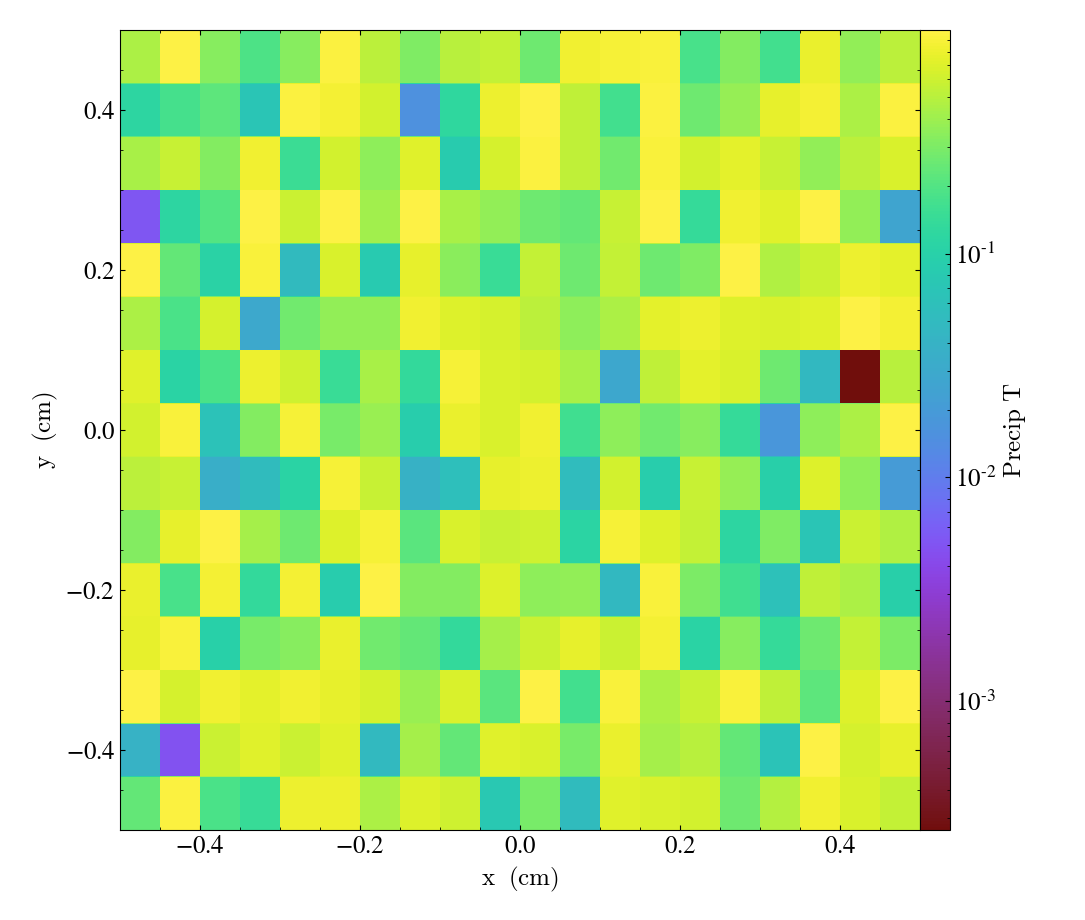

In [3]:
yt.SlicePlot(yt_ds, "z", ("stream", "precip_t"))